# StationSim Grand Central Station (stationsim_gcs) - Calibration
    author: P. Ternes
    created: 28/05/2020

This text shows how we obtained the general informations from the real Grand Central Terminal (GCT) data. With these informations, the simulation parameters have values consistent with reality. The main parameters are:

* Characteristics of GCT: environment size, clock location and size, gates location;
* Characteristics of agents: agent size, agent mean velocity;
* Flow rate of agents through the gates to adjust the activation rate;

## Source of real data

The data assimilation experiments using real data are conducted using information from a video sequence, recorded at Grand Central Terminal (GCT). The original video is a 33:20-minutes video sequence shoot at 25fps with a resolution of 720x480.

The Grand Terminal data is available on the website: http://www.ee.cuhk.edu.hk/~xgwang/grandcentral.html

## Reading the trajectories

In [1]:
from scipy.io import loadmat

#open and read original file
file_name = "gcs_real_trajectories.mat"
file = loadmat(file_name)
trajectories = file["trks"][0]

## Organize the data
To facilitate future analysis, the trajectories will be reorganized in a list called "data". Each line in this list will have 4 elements: pedestrian ID, position $x$, position $y$, and time.

In [2]:
data = []
for i in range (len(trajectories)):
    x, y, t = trajectories[i]
    x, y, t = x.flatten(), y.flatten(), t.flatten()
    for j in range (len(x)):
        values = [i, x[j], y[j], t[j]]  # indices: ['pedestrianID', 'x', 'y', 'time']
        data.append(values)

### Number of frames and pedestrians

The number of frames and pedestrians of the real data can be obtained by looking at the last line of the list after sorting it.

In [3]:
from operator import itemgetter

#sort by frame
data1 = sorted(data, key=itemgetter(3))
n_frame =  data1[-1][3] + 1
print('Number of frames: ', n_frame)

#sort by pedestrian
data2 = sorted(data, key=itemgetter(0))
n_pedestrian = data1[-1][0] + 1
print('Number of pedestrians: ', n_pedestrian)

Number of frames:  50010
Number of pedestrians:  42821


### Trails without treatment

To get an overview of the data, some trajectories are plotted below. Note that the visualization is upside down. Also note that the trajectories on the sides are not parallel to the $y$-axis.

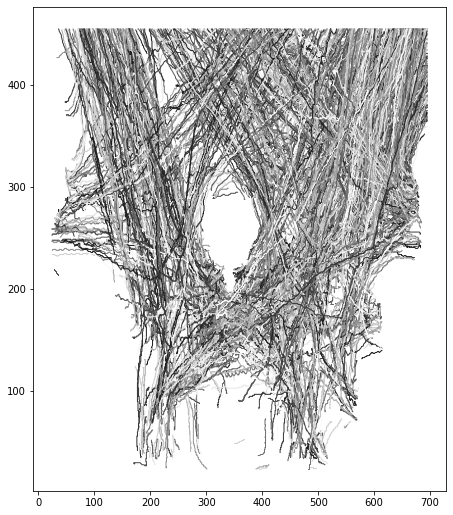

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(num=None, figsize=(7.4, 8.9), facecolor='w', edgecolor='k')

agent = 0
x , y = [], []
for i in range (500000):
        if (data2[i][0] == agent):
            x.append(data2[i][1])
            y.append(data2[i][2])
        else:
            gray_scale = np.random.uniform(0.1,1)
            plt.plot (x, y, '-', lw=1, color=str(gray_scale))
            agent += 1
            x , y = [], []
            x.append(data2[i][1])
            y.append(data2[i][2])

## Transforming the data

The complete explanation about the data transformation can be found here (cite Vijay's notebook).


In [5]:
from operator import itemgetter
data3 = []
for i in range (len(data)):
    data[i][2] = -1.* data[i][2] + 455.   # correct upside down
    data3.append(data[i])
    ratio = data[i][2]/431
    data3[i][1] = data[i][1]-347.5 #centre x axis to camera
    data3[i][1] = data3[i][1] * (1 + ratio)  # new x position
    data3[i][2] = data[i][2] * (1 + ratio)  # new y position

#sort by frame
data1 = sorted(data3, key=itemgetter(3))

#sort by pedestrian
data2 = sorted(data3, key=itemgetter(0))

### Trails with treatment

To obtain an overview of the data, some transformed trajectories are plotted below. Note that the view is no longer upside down. Also note that the vertical paths are now parallel to the y axis.

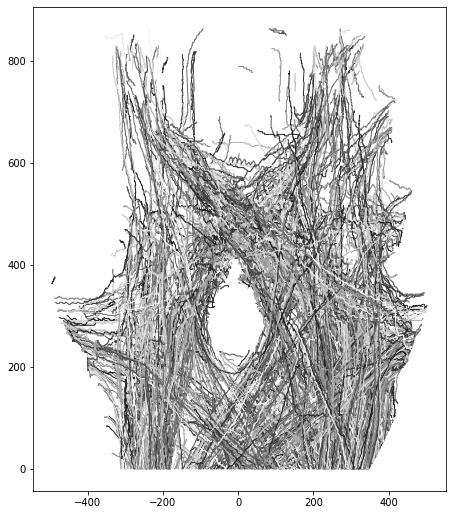

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(num=None, figsize=(7.4, 8.9), facecolor='w', edgecolor='k')

agent = 0
x , y = [], []
for i in range (500000):
        if (data2[i][0] == agent):
            x.append(data2[i][1])
            y.append(data2[i][2])
        else:
            gray_scale = np.random.uniform(0.1,1)
            plt.plot (x, y, '-', lw=1, color=str(gray_scale))
            agent += 1
            x , y = [], []
            x.append(data2[i][1])
            y.append(data2[i][2])

### Adding the station walls

Using the trajectories as references we will determine the position of the walls and other structures of the station. In the next figure on the left, elements consistent with the real GCT structure have been incorporated into the graph. The red dashed line separate the camera's field of view from non-visible region. Only the visible region will be simulated, and the figure on the right shows the version of the station adapted for use in the StationSim_gcs model. Some pseudo-real gates (gates from 7 to 10) are created to demarcate the pedestrian entry and exit regions when the agents cross the line that separates the visible region from the non-visible region.

The structures dimentions are in pixel. For this data, to transform from pixel to metre:

$$1\hbox{ metre} = 14 \hbox{ pixel}$$

Text(0, 0.5, 'Height (pixel)')

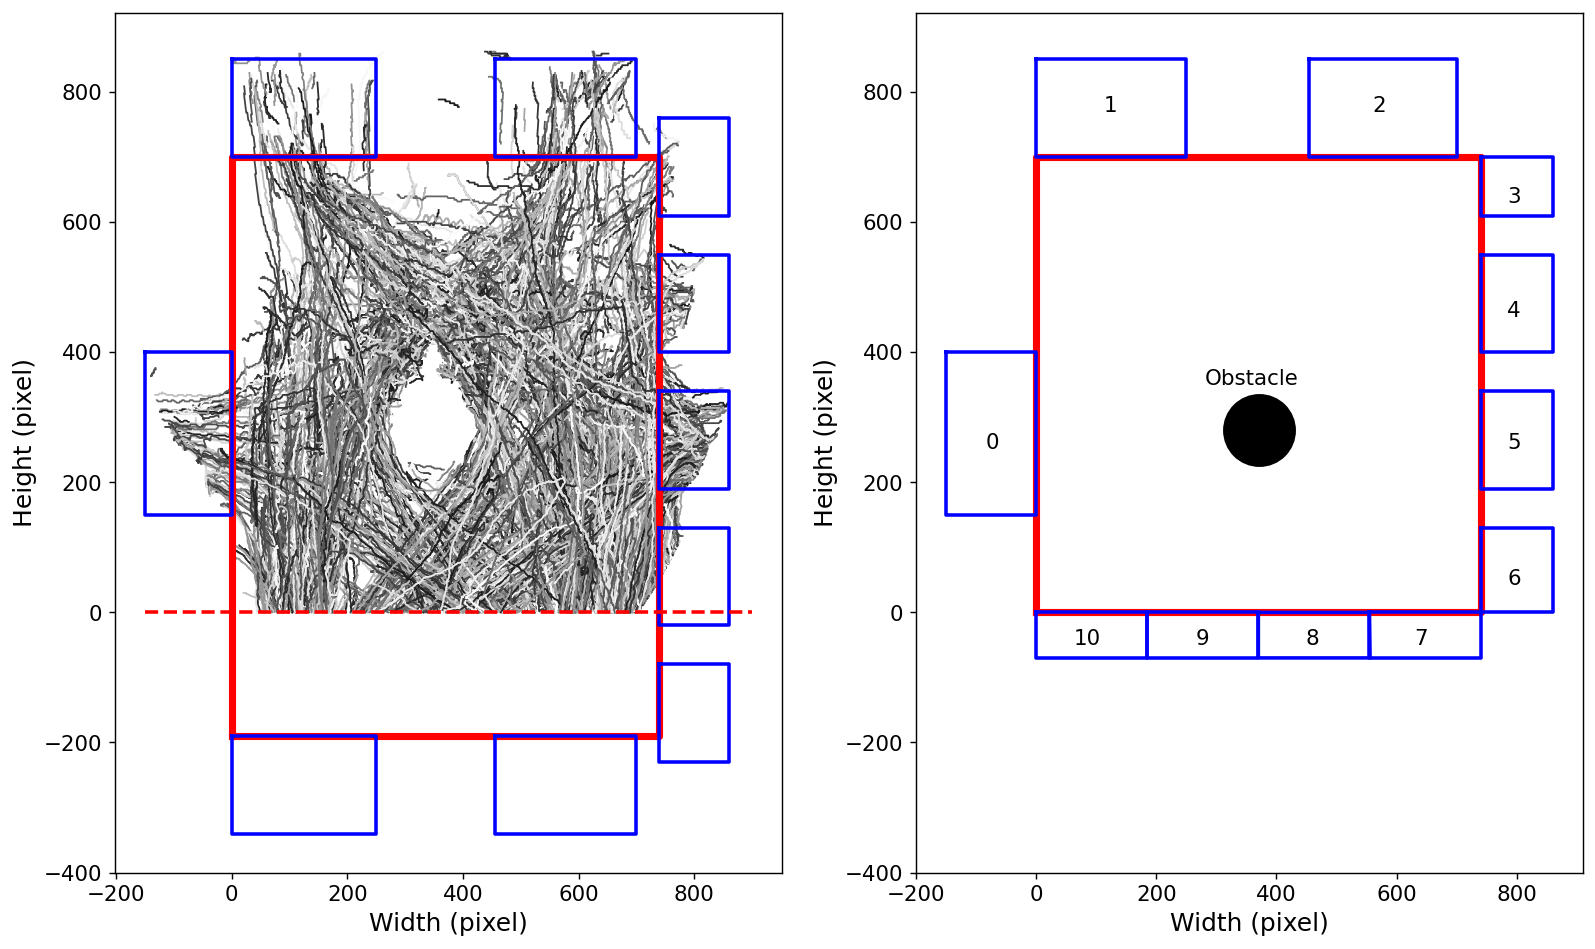

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(num=None, figsize=(14.8, 8.9), dpi=128, facecolor='w', edgecolor='k')
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, sharey=ax1)

agent = 0
x , y = [], []
for i in range (500000):
        if (data2[i][0] == agent):
            x.append(data2[i][1] + 355.1403712296984)
            y.append(data2[i][2])
        else:
            gray_scale = np.random.uniform(0.1,1)
            ax1.plot (x, y, '-', lw=1, color=str(gray_scale))
            agent += 1
            x , y = [], []
            x.append(data2[i][1] + 355.1403712296984)
            y.append(data2[i][2])

# plotting the station walls
a = [0, 0, 740, 740, 0]; b = [-190, 700, 700, -190, -190]; ax1.plot(a,b,'-', linewidth=4,color='r')
a = [0, 0, 740, 740, 0]; b = [0, 700, 700, 0, 0]; ax2.plot(a,b,'-', linewidth=4,color='r')

# plotting the station gate 0
a = [-150, 0, 0, -150, -150]; b = [400, 400, 150, 150, 400]; ax1.plot(a,b,'-', linewidth=2,color='b')
ax2.plot(a, b,'-',linewidth=2,color='b'); ax2.text(-84, 252, '0', fontsize=12)

# plotting the station gate 1
a = [0, 250, 250, 0, 0]; b = [850, 850, 700, 700, 850]; ax1.plot(a,b,'-', linewidth=2,color='b')
ax2.plot(a, b,'-',linewidth=2,color='b'); ax2.text(112, 770, '1', fontsize=12)

# plotting the station gate 2
a = [455, 700, 700, 455, 455]; b = [850, 850, 700, 700, 850]; ax1.plot(a,b,'-', linewidth=2,color='b')
ax2.plot(a, b,'-',linewidth=2,color='b'); ax2.text(560, 770, '2', fontsize=12)

# plotting the station gate 3
a = [740, 860, 860, 740, 740]; b = [760, 760, 610, 610, 760]; ax1.plot(a,b,'-', linewidth=2,color='b') 
b = [700, 700, 610, 610, 700]; ax2.plot(a, b,'-',linewidth=2,color='b'); ax2.text(784, 630, '3', fontsize=12)

# plotting the station gate 4
a = [740, 860, 860, 740, 740]; b = [550, 550, 400, 400, 550]; ax1.plot(a,b,'-', linewidth=2,color='b')
ax2.plot(a, b,'-',linewidth=2,color='b'); ax2.text(784, 455.0, '4', fontsize=12)

# plotting the station gate 5
a = [740, 860, 860, 740, 740]; b = [340, 340, 190, 190, 340]; ax1.plot(a,b,'-', linewidth=2,color='b')
ax2.plot(a, b,'-',linewidth=2,color='b'); ax2.text(784, 252, '5', fontsize=12)

# plotting the station gate 6
a = [740, 860, 860, 740, 740]; b = [130, 130, -20, -20, 130]; ax1.plot(a,b,'-', linewidth=2,color='b')
b = [130, 130, 0, 0, 130]; ax2.plot(a, b,'-',linewidth=2,color='b'); ax2.text(784, 42,  '6', fontsize=12)

# plotting the station gate 7_real
a = [740, 860, 860, 740, 740]; b = [-80, -80, -230, -230, -80]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 8_real
a = [455, 700, 700, 455, 455]; b = [-190, -190, -340, -340, -190]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 9_real
a = [0, 250, 250, 0, 0]; b = [-190, -190, -340, -340, -190]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 7
a = [555, 740, 740, 555, 555]; b = [0, 0, -70, -70, 0]; ax2.plot(a, b, linewidth=2,color='b')
ax2.text(630, -49.0, '7', fontsize=12)

# plotting the station gate 8
a = [370, 555, 556, 370, 370]; b = [0, 0, -70, -70, 0]; ax2.plot(a, b, linewidth=2,color='b')
ax2.text(448,-49, '8', fontsize=12)

# plotting the station gate 9
a = [185, 370, 370, 185, 185]; b = [0, 0, -70, -70, 0]; ax2.plot(a, b, linewidth=2,color='b')
ax2.text(266, -49.0, '9', fontsize=12)

# plotting the station gate 10
a = [0, 185, 185, 0, 0]; b = [0, 0, -70, -70, 0]; ax2.plot(a, b, linewidth=2,color='b')
ax2.text(63.0, -49.0, '10', fontsize=12)

# plotting view separation line plot ax1
a = [-150, 900]; b = [0, 0]; ax1.plot(a, b,'--', linewidth=2,color='r')

# plotting obstacle plot ax2
ax2.plot(371.0, 280, 'o' ,linewidth=2, color='k', ms = 40); ax2.text(280, 350, 'Obstacle', fontsize=12)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Width (pixel)", fontsize=14); ax1.set_ylabel("Height (pixel)", fontsize=14)
ax2.set_xlabel("Width (pixel)", fontsize=14); ax2.set_ylabel("Height (pixel)", fontsize=14)

## Velocity of pedestrians

Three important parameters used to run the StationSim_gcs model are related with pedestrian speed:

* mean speed;
* standard deviation speed;
* minimum speed;

To obtain these parameters, a histogram is made with the pedestrian speeds and the parameters are obtained from a Gaussian fit.

The result is shown in pixel/frame (left) and in metre/second (right) where:

$$ 1 \dfrac{\hbox{pixel}}{\hbox{frame}} = \dfrac{25}{14} \dfrac{\hbox{metre}}{\hbox{second}}$$
    

Velocities in pixel/frame:
Adjusted Gaussian distribution with mean of  0.8719127839925644 pixel/frame
Adjusted Gaussian distribution with standard deviation of  0.31541650336123594 pixel/frame
Minimum speed:  0.030232558139534883 m/s 

Velocities in m/s:
Adjusted Gaussian distribution with mean of  1.5569871142724367 m/s
Adjusted Gaussian distribution with standard deviation of  0.5632437560022071 m/s
Minimun speed:  0.05398671096345515 m/s


Text(0, 0.5, 'Frequency')

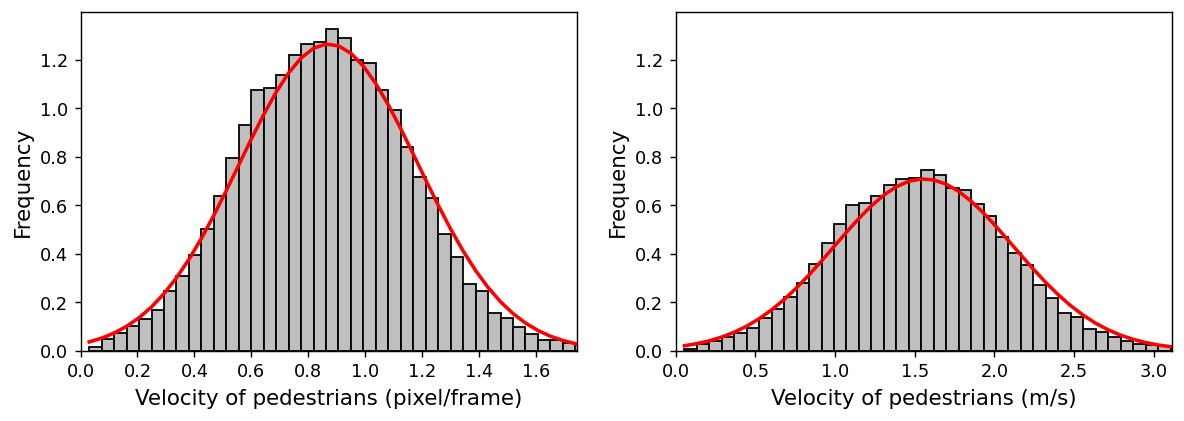

In [8]:
yy = []
transf = 25.0 / 14  # from (pixel/frame) to (m/s)

# getting speeds
agent = 0
x , y = [], []
for i in range (len(data2)):
    if (data2[i][0] == agent):
        x.append(data2[i][1])
        y.append(data2[i][2])
    else:
        deltaX = x[-1] - x[0]
        deltaY = y[-1] - y[0]           
        delta = np.sqrt(deltaX*deltaX + deltaY*deltaY)
        vel = delta / float(len(x))
        yy.append(vel)           
            
        agent += 1
        x , y = [], []
        x.append(data2[i][1])
        y.append(data2[i][2])
        
fig, ax = plt.subplots(num=None,figsize=(11, 3.5),dpi=128,facecolor='w',edgecolor='k',sharex='col',sharey='row')
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=True)

import math
n_bins = 20*math.ceil(max(yy) - min(yy))
n, bins, patches = ax1.hist(yy, bins=n_bins, density=True, color='0.75', edgecolor='k', lw = 1)

from scipy.stats import norm
import scipy.stats as scs
# determining fitting parameters
(mu, sigma) = norm.fit(yy)
ax1.set_xlim(0, 2.*mu) 

# plot adjusted normal distribution
y = scs.norm.pdf(bins, mu, sigma)
ax1.plot(bins, y, '-', color='r', lw = 2)

print('Velocities in pixel/frame:')
print('Adjusted Gaussian distribution with mean of ', mu, 'pixel/frame')
print('Adjusted Gaussian distribution with standard deviation of ', sigma, 'pixel/frame')
print('Minimum speed: ', min(yy), 'm/s \n')

yy = [yy[i]*transf for i in range(len(yy))]
n, bins, patches = ax2.hist(yy, bins=n_bins, density=True, color='0.75', edgecolor='k', lw = 1)

from scipy.stats import norm
import scipy.stats as scs
# determining fitting parameters
(mu, sigma) = norm.fit(yy)
ax2.set_xlim(0, 2.*mu) 

# plot adjusted normal distribution
y = scs.norm.pdf(bins, mu, sigma)
ax2.plot(bins, y, '-', color='r', lw = 2)
print('Velocities in m/s:')
print('Adjusted Gaussian distribution with mean of ', mu, 'm/s')
print('Adjusted Gaussian distribution with standard deviation of ', sigma, 'm/s')
print('Minimun speed: ', min(yy), 'm/s')


ax1.set_xlabel("Velocity of pedestrians (pixel/frame)", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)
ax2.set_xlabel("Velocity of pedestrians (m/s)", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)

## Number of pedestrians

To calibrate the number of agents that are used to run the StationSim-NV model, we analyze 50010frames extracted from the video of the Main Concourse of the Central Grand Terminal.

Adjusted Gaussian distribution 1 with mean of  79.68405784623816 pedestrians
Adjusted Gaussian distribution 1 with standard deviation of  34.18956787169881 pedestrians
Adjusted Gaussian distribution 2 with mean of  199.92847846159466 pedestrians
Adjusted Gaussian distribution 2 with standard deviation of  58.563101317794505 pedestrians


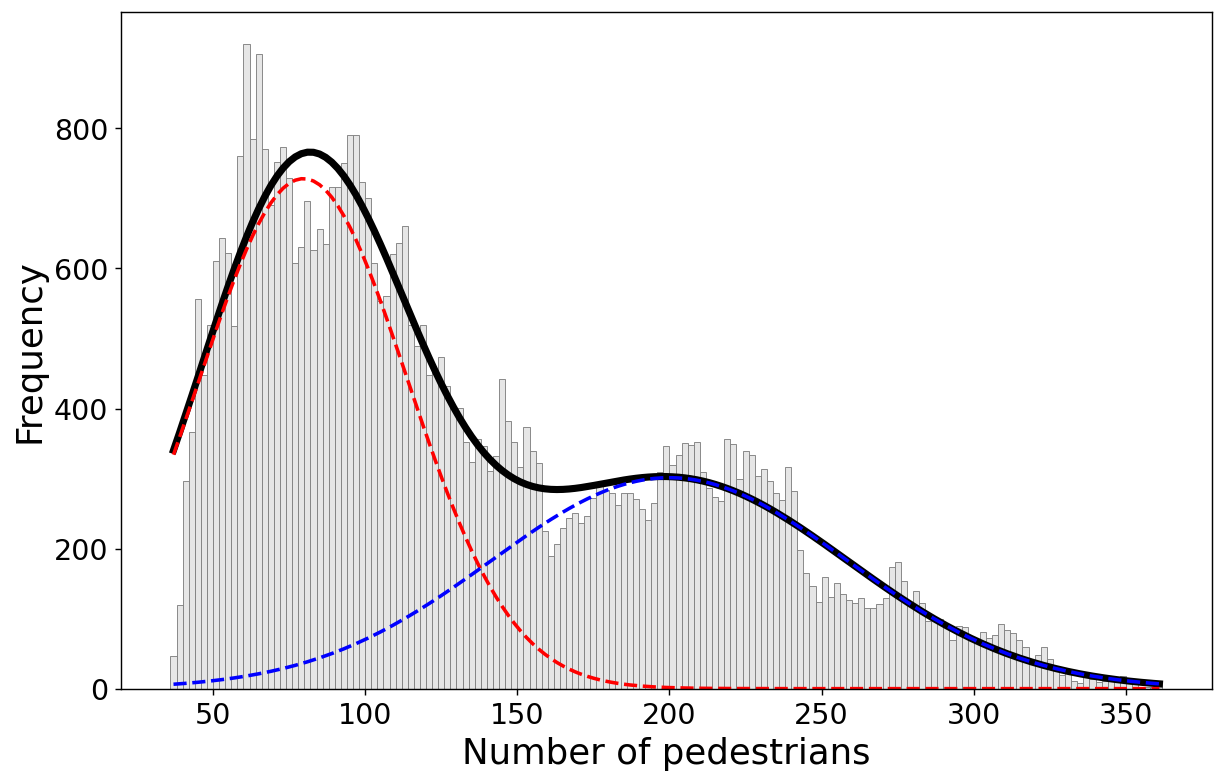

In [9]:
yy = []

frame = 1
pID = []
for i in range (len(data1)):
    if (data1[i][3] == frame):
        pID.append(data2[i][0])
    else:
        yy.append(len(pID))
        frame += 1
        pID = []
        pID.append(data2[i][0])

from pylab import *
from scipy.optimize import curve_fit

fig, ax = plt.subplots(num=None, figsize=(11, 7), dpi=128, facecolor='w', edgecolor='k')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel("Number of pedestrians", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

# plot normed histogram
import math
n_bins = int(math.ceil(max(yy) - min(yy))/2)

y,x,_ = plt.hist(yy, bins=n_bins, color='0.9', edgecolor='0.5', lw = 0.5)

x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected=(83,30,700,190,50,300)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='black',lw=4)
plot(x,gauss(x,params[0],params[1],params[2]), '--',color='red',lw=2)
plot(x,gauss(x,params[3],params[4],params[5]), '--',color='blue',lw=2)

print('Adjusted Gaussian distribution 1 with mean of ', params[0], 'pedestrians')
print('Adjusted Gaussian distribution 1 with standard deviation of ', params[1], 'pedestrians')
print('Adjusted Gaussian distribution 2 with mean of ', params[3], 'pedestrians')
print('Adjusted Gaussian distribution 2 with standard deviation of ', params[4], 'pedestrians')


This is bimodal histogram of the number of pedestrians in the scene and indicates that during the 50010 frames we have different dynamics. To understand when these different behaviours occur, an analysis about the number of pedestrians as a function of frame is made.

Then, just 5000 frames are selected to perform a new analysis about the number of pedestrian.

Adjusted Gaussian distribution with mean of  59.00966666666667 pedestrians
Adjusted Gaussian distribution with standard deviation of  8.260442273604697 pedestrians


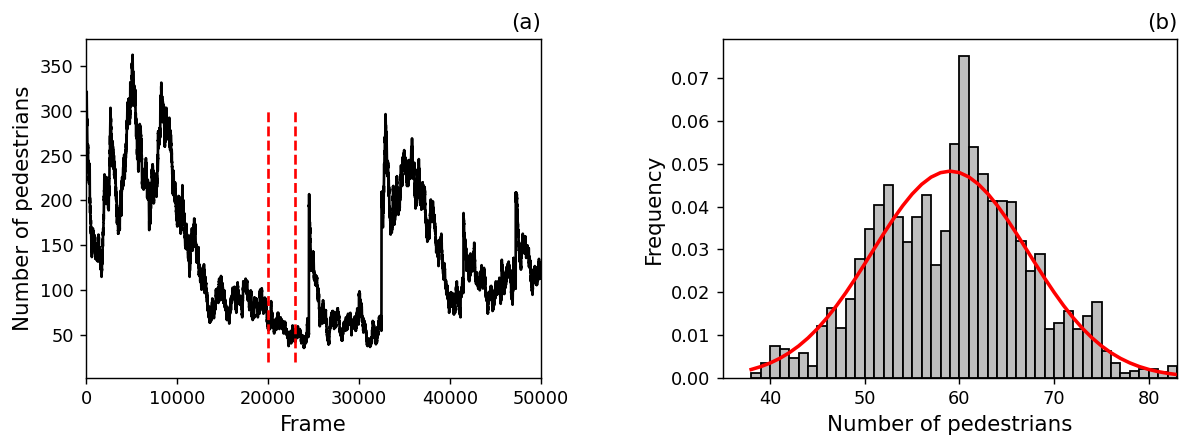

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(num=None,figsize=(11, 3.5),dpi=128,facecolor='w',edgecolor='k',sharex='col',sharey='row')
#ax1.tick_params(axis='both', which='major', labelsize=16)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

x = [i for i in range(1, 50009, 1)]

ax1.plot (x, yy,'-', color='k', ms=1)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_ylabel("Number of pedestrians", fontsize=12)
ax1.set_xlabel("Frame", fontsize=12)

a = [20000, 20000]
b = [20,300]
ax1.plot (a, b,'--', color='r', ms=1)
a = [23000, 23000]
ax1.plot (a, b,'--', color='r', ms=1)

yyy = []

for i in range (20000, 23000, 1):
    yyy.append(yy[i])
ax2.set_xlabel("Number of pedestrians", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)

n_bins = math.ceil(max(yyy) - min(yyy))
n, bins, patches = ax2.hist(yyy, bins=n_bins, density=True, color='0.75', edgecolor='k', lw = 1)

from scipy.stats import norm
import scipy.stats as scs
# determining fitting parameters
(mu, sigma) = norm.fit(yyy)

# plot adjusted normal distribution
y = scs.norm.pdf(bins, mu, sigma)
ax2.plot(bins, y, '-', color='r', lw = 2)
ax2.set_xlim(35, 2.*mu-35)
ax1.set_xlim(0, 50010)

print('Adjusted Gaussian distribution with mean of ', mu, 'pedestrians')
print('Adjusted Gaussian distribution with standard deviation of ', sigma, 'pedestrians')

plt.subplots_adjust(wspace = 0.4)
ax1.set_title('(a)', loc='right')
ax2.set_title('(b)', loc='right')
plt.savefig('fig-phil_trans/population-frames-hist.png', bbox_inches="tight")

## Activation rate

The last important parameter to determine is the activation rate. According to the article [`Understanding Collective Crowd Behaviors: Learning a Mixture Model of Dynamic Pedestrian-Agents`](https://people.csail.mit.edu/bzhou/project/cvpr2012/zhoucvpr2012.pdf), the activation rate is constant and should be calibrated to take the desired number of agents at the station.

As we select frames from 15000 to 20000, the activation rate must be calibrated so that the scene will reach its capacity with 87 agents.

To do this, we will test the StationSim model with the parameters determined by the analyzes above and different activation rates. Finally, the number of agents will be analyzed.


### Initialisation

Read the requred libraries

In [11]:
%matplotlib inline

import sys
sys.path.append('../..')
from stationsim.stationsim_gcs_model import Model
import seaborn as sns
from time import strftime
import pprint

### Model parameters

To create a station with the structure of the Grand Central station is necesary to pass to the model a parameter with the key 'station' and the value 'Grand_Central'. Using the value 'Grand_Central' all parameters obtained from the analyzes presented above are automatically determined within the model. E.g. like this:

###  Run the model

To begin, create a new model and run it:

In [12]:
x_br, y_br = [], []
models = []
for i in range (15, 25, 1):
    model_params = {'pop_total': 300,
                    'step_limit': 50000,
                    'do_print': False,
                    'birth_rate': 25. / float(i),
                    'station': 'Grand_Central'}
    model = Model(**model_params)
    model.gates_space = 28.0
    xx, yy = [], []
    for _ in range(model.step_limit):
        model.step()
        numActAgent = 0  # number of active agents in each step;
        for agent in(model.agents):
            if (agent.status == 1):
                numActAgent += 1
        xx.append(model.step_id)
        yy.append(numActAgent)
    x_br.append(xx)
    y_br.append(yy)
    models.append(model)
    print('End - birth_rate:', i)

End - birth_rate: 15
End - birth_rate: 16
End - birth_rate: 17
End - birth_rate: 18
End - birth_rate: 19


../../stationsim/stationsim_gcs_model.py:174: RuntimeWarning: invalid value encountered in true_divide
  return (loc_desire - location) / self.distance(loc_desire, location)


End - birth_rate: 20
End - birth_rate: 21
End - birth_rate: 22
End - birth_rate: 23
End - birth_rate: 24


###  Birth rate analysis

First all results are analysed. 

Number of active agents for birth_rate of 1.6666666666666667
Adjusted Gaussian distribution with mean of  81.01466666666667 agents
Adjusted Gaussian distribution with standard deviation of  4.531054132931492 agents

Number of active agents for birth_rate of 1.5625
Adjusted Gaussian distribution with mean of  71.49533333333333 agents
Adjusted Gaussian distribution with standard deviation of  3.6795803504687266 agents

Number of active agents for birth_rate of 1.4705882352941178
Adjusted Gaussian distribution with mean of  72.26933333333334 agents
Adjusted Gaussian distribution with standard deviation of  2.4944190149656538 agents

Number of active agents for birth_rate of 1.3888888888888888
Adjusted Gaussian distribution with mean of  62.43666666666667 agents
Adjusted Gaussian distribution with standard deviation of  1.4359627045605639 agents

Number of active agents for birth_rate of 1.3157894736842106
Adjusted Gaussian distribution with mean of  57.24933333333333 agents
Adjusted Gauss

Text(0, 0.5, 'Number of active agents ')

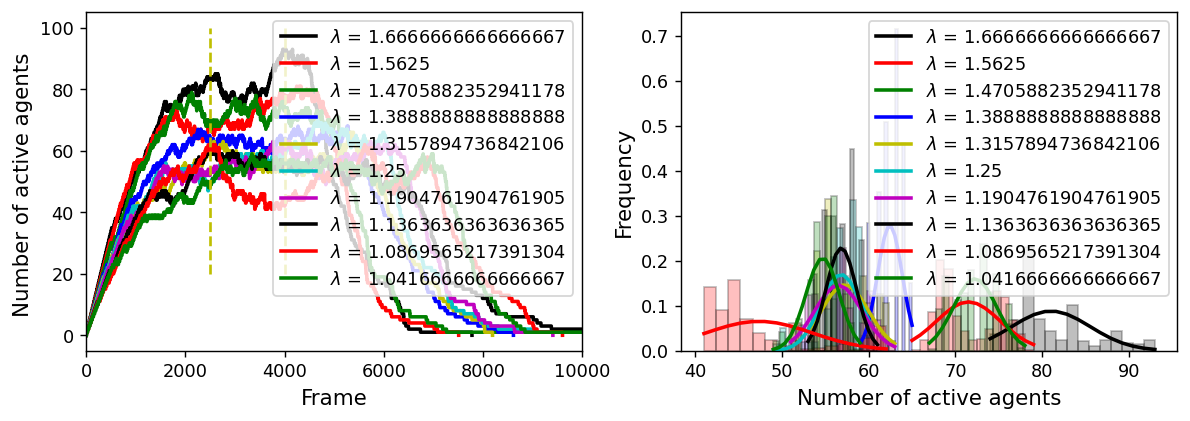

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(num=None,figsize=(11, 3.5),dpi=128,facecolor='w',edgecolor='k',sharex='col',sharey='row')
ax2 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

colors = ['k', 'r', 'g', 'b', 'y','c','m','k', 'r', 'g', 'b', 'y','c','m']


for h in range(len(models)):
    print('Number of active agents for birth_rate of', models[h].birth_rate)    

    yy = []
    for i in range (2500, 4000, 1):
        yy.append(y_br[h][i])

    import math
    n_bins = 15 #int(math.ceil(max(yy) - min(yy))/6)
    
    n, bins, patches = ax1.hist(yy, bins=n_bins, density=True, color=colors[h],alpha=0.25, edgecolor='k',  lw = 1)
    from scipy.stats import norm
    import scipy.stats as scs
    # determining fitting parameters
    (mu, sigma) = norm.fit(yy)
    #ax1.set_xlim(0, 2.*mu)
    # plot adjusted normal distribution
    yyy = scs.norm.pdf(bins, mu, sigma)
    lab = r'$\lambda$ = ' + '%.2f' % models[h].birth_rate + ' agents/s'
    ax1.plot(bins, yyy, '-', color = colors[h], lw = 2, label = lab)
    print('Adjusted Gaussian distribution with mean of ', mu, 'agents')
    print('Adjusted Gaussian distribution with standard deviation of ', sigma, 'agents')
    print()

    ax2.plot(x_br[h], y_br[h], '-', color = colors[h], lw = 2, label = lab)

a = [2500, 2500]
b = [20,100]
ax2.plot (a, b,'--', color='y', ms=1)
a = [4000, 4000]
ax2.plot (a, b,'--', color='y', ms=1)
ax2.set_xlim(0, 10000)
ax2.legend()
ax1.legend()
ax1.set_xlabel("Number of active agents", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)
ax2.set_xlabel("Frame", fontsize=12)
ax2.set_ylabel("Number of active agents ", fontsize=12)
#plt.savefig('birth_rate.png', bbox_inches="tight")

To improve the visualization just some $\lambda$ values are used.

Number of active agents for birth_rate of 1.0416666666666667
Adjusted Gaussian distribution with mean of  54.684666666666665 agents
Adjusted Gaussian distribution with standard deviation of  1.9352600743971222 agents

Number of active agents for birth_rate of 1.25
Adjusted Gaussian distribution with mean of  56.81 agents
Adjusted Gaussian distribution with standard deviation of  2.3544072148490653 agents

Number of active agents for birth_rate of 1.5625
Adjusted Gaussian distribution with mean of  71.49533333333333 agents
Adjusted Gaussian distribution with standard deviation of  3.6795803504687266 agents

Number of active agents for birth_rate of 1.6666666666666667
Adjusted Gaussian distribution with mean of  81.01466666666667 agents
Adjusted Gaussian distribution with standard deviation of  4.531054132931492 agents



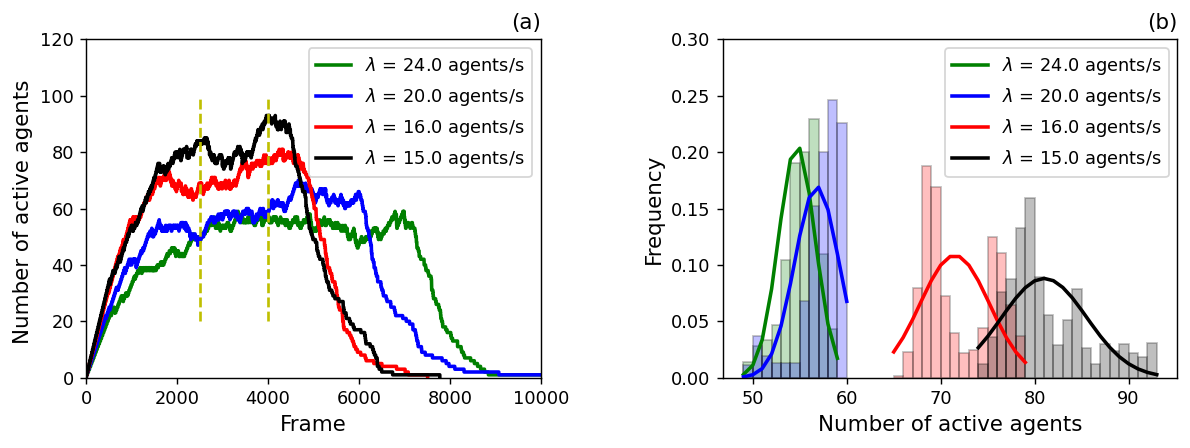

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(num=None,figsize=(11, 3.5),dpi=128,facecolor='w',edgecolor='k',sharex='col',sharey='row')
ax2 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

colors = ['k', 'r', 'g', 'b', 'b','b','m','k', 'r', 'g', 'b', 'y','c','m']

a = [9, 5,1,0]

for h in a:
    print('Number of active agents for birth_rate of', models[h].birth_rate)    

    yy = []
    for i in range (2500, 4000, 1):
        yy.append(y_br[h][i])

    import math
    n_bins = int(math.ceil(max(yy) - min(yy)))
    
    n, bins, patches = ax1.hist(yy, bins=n_bins, density=True, color=colors[h],alpha=0.25, edgecolor='k',  lw = 1)
    from scipy.stats import norm
    import scipy.stats as scs
    # determining fitting parameters
    (mu, sigma) = norm.fit(yy)
    #ax1.set_xlim(0, 2.*mu)
    # plot adjusted normal distribution
    yyy = scs.norm.pdf(bins, mu, sigma)
    lab = r'$\lambda$ = ' + '%.2f' % models[h].birth_rate + ' agents/s'
    ax1.plot(bins, yyy, '-', color = colors[h], lw = 2, label = lab)
    print('Adjusted Gaussian distribution with mean of ', mu, 'agents')
    print('Adjusted Gaussian distribution with standard deviation of ', sigma, 'agents')
    print()

    ax2.plot(x_br[h], y_br[h], '-', color = colors[h], lw = 2, label = lab)

a = [2500, 2500]
b = [20,100]
ax2.plot (a, b,'--', color='y', ms=1)
a = [4000, 4000]
ax2.plot (a, b,'--', color='y', ms=1)
ax2.set_xlim(0, 10000)
ax2.set_ylim(0, 120)
ax1.set_ylim(0, 0.3)
ax2.legend()
ax1.legend()
ax1.set_xlabel("Number of active agents", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)
ax2.set_xlabel("Frame", fontsize=12)
ax2.set_ylabel("Number of active agents ", fontsize=12)
plt.subplots_adjust(wspace = 0.4)
ax2.set_title('(a)', loc='right')
ax1.set_title('(b)', loc='right')
plt.savefig('fig-phil_trans/birth_rate.png', bbox_inches="tight")

## Trails and density map for the Trans-Phil paper

### Real data

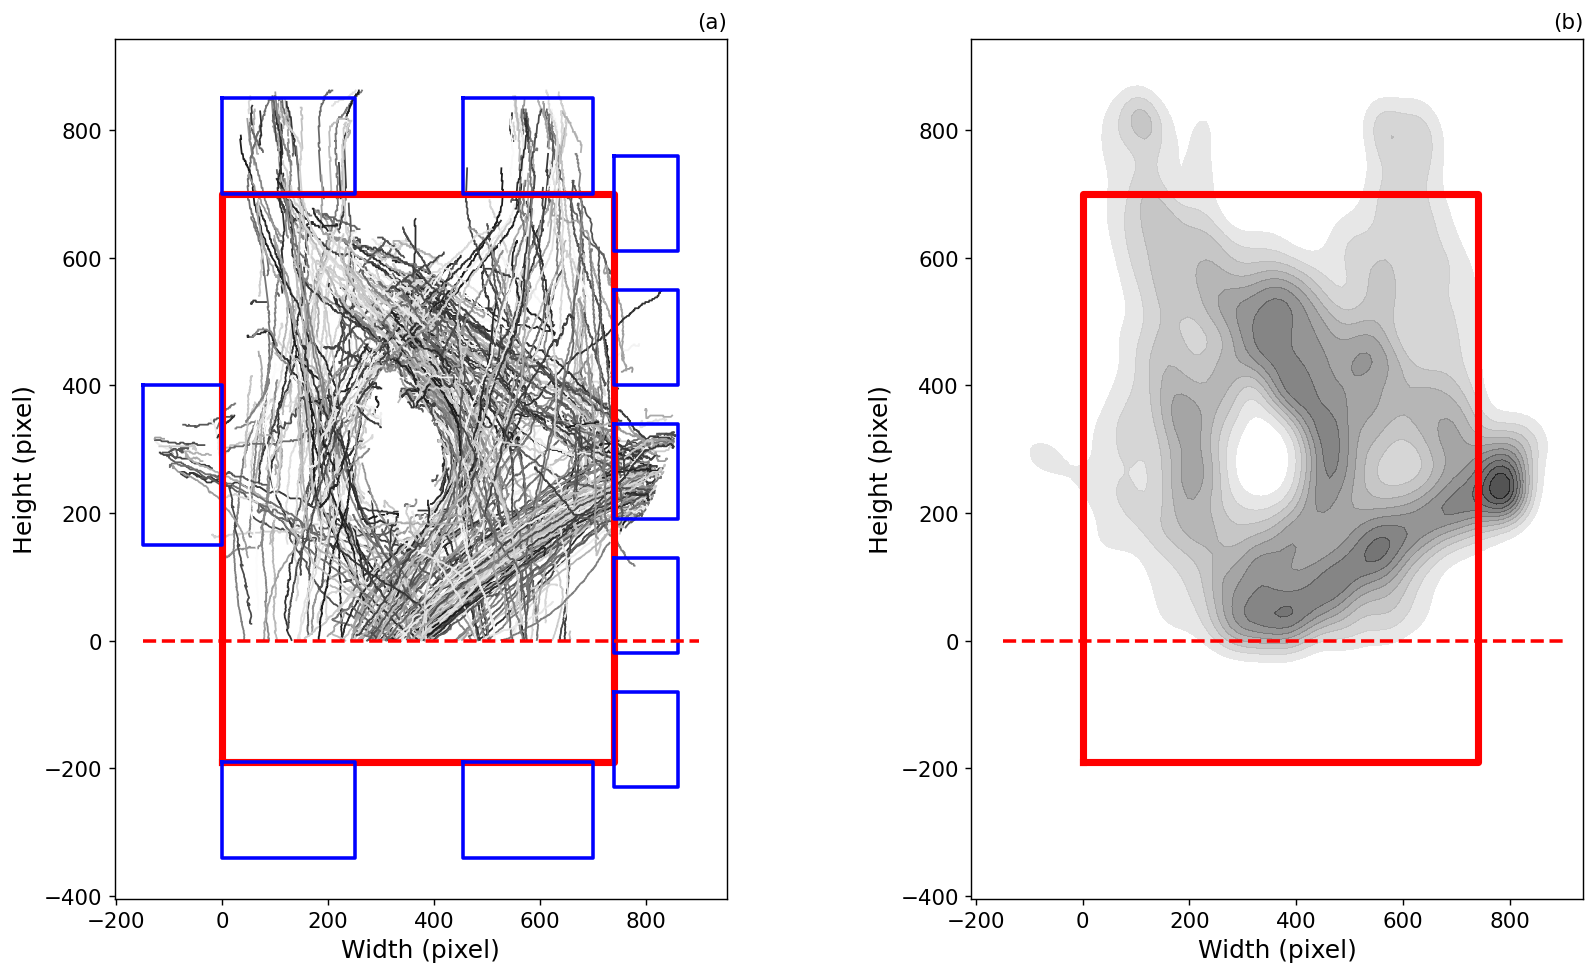

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(num=None, figsize=(14.8, 8.9), dpi=128, facecolor='w', edgecolor='k')
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, sharey=ax1)

history_locs = []
agent = 0
x , y = [], []
for i in range (len(data2)):
        if (data2[i][0] == agent):
            if(data2[i][3]>=20000 and data2[i][3]<23000):
                x.append(data2[i][1] + 355.1403712296984)
                y.append(data2[i][2])
                history_locs.append([data2[i][1]+ 355.1403712296984, data2[i][2]])
        else:
            gray_scale = np.random.uniform(0.1,1)
            ax1.plot (x, y, '-', lw=1, color=str(gray_scale))
            agent += 1
            x , y = [], []
            #x.append(data2[i][1])
            #y.append(data2[i][2])
history_locs = np.array(history_locs).T

# plotting the station walls
a = [0, 0, 740, 740, 0]; b = [-190, 700, 700, -190, -190]; ax1.plot(a,b,'-', linewidth=4,color='r')
ax2.plot(a,b,'-', linewidth=4,color='r')

# plotting the station gate 0
a = [-150, 0, 0, -150, -150]; b = [400, 400, 150, 150, 400]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 1
a = [0, 250, 250, 0, 0]; b = [850, 850, 700, 700, 850]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 2
a = [455, 700, 700, 455, 455]; b = [850, 850, 700, 700, 850]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 3
a = [740, 860, 860, 740, 740]; b = [760, 760, 610, 610, 760]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 4
a = [740, 860, 860, 740, 740]; b = [550, 550, 400, 400, 550]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 5
a = [740, 860, 860, 740, 740]; b = [340, 340, 190, 190, 340]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 6
a = [740, 860, 860, 740, 740]; b = [130, 130, -20, -20, 130]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 7_real
a = [740, 860, 860, 740, 740]; b = [-80, -80, -230, -230, -80]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 8_real
a = [455, 700, 700, 455, 455]; b = [-190, -190, -340, -340, -190]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting the station gate 9_real
a = [0, 250, 250, 0, 0]; b = [-190, -190, -340, -340, -190]; ax1.plot(a,b,'-', linewidth=2,color='b')

# plotting view separation line plot ax1
a = [-150, 900]; b = [0, 0]; ax1.plot(a, b,'--', linewidth=2,color='r'); ax2.plot(a, b,'--', linewidth=2,color='r')

#fig.tight_layout(pad=0)
cmap=None
cbar=False
cmap = 'gray_r'
alpha=0.7
title="Density Map"

from seaborn import kdeplot as sns_kdeplot
sns_kdeplot(*history_locs, ax=ax2, cmap=cmap, alpha=alpha, shade=True, shade_lowest=False, cbar=cbar)

#ax1.set_xlim(0, 740); ax1.set_ylim(0, 700)

plt.subplots_adjust(wspace = 0.4)
ax1.set_title('(a)', loc='right')
ax2.set_title('(b)', loc='right')

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Width (pixel)", fontsize=14); ax1.set_ylabel("Height (pixel)", fontsize=14)
ax2.set_xlabel("Width (pixel)", fontsize=14); ax2.set_ylabel("Height (pixel)", fontsize=14)
plt.savefig('fig-phil_trans/REAL-trials_location_map.png', bbox_inches="tight")

In [20]:
model_params = {'pop_total': 300,
                'step_limit': 50000,
                'do_print': False,
                'birth_rate': 1.25,
                'station': 'Grand_Central'}
model = Model(**model_params)
model.gates_space = 28.0
history_locs_model = []

xx = [[] for _ in range(model.pop_total)]
yy = [[] for _ in range(model.pop_total)]

for _ in range(model.step_limit):
    model.step()
    numActAgent = 0  # number of active agents in each step;
    if (model.step_id>=2500 and model.step_id < 5500): # 3000 steps!
        for agent in(model.agents):
            if (agent.status == 1):
                history_locs_model.append([agent.location[0], agent.location[1]])
                xx[agent.unique_id].append(agent.location[0])
                yy[agent.unique_id].append(agent.location[1])
                
history_locs1 = np.array(history_locs_model).T



	Iteration: 0/50000
	Iteration: 100/50000
	Iteration: 200/50000
	Iteration: 300/50000
	Iteration: 400/50000
	Iteration: 500/50000
	Iteration: 600/50000
	Iteration: 700/50000
	Iteration: 800/50000
	Iteration: 900/50000
	Iteration: 1000/50000
	Iteration: 1100/50000
	Iteration: 1200/50000
	Iteration: 1300/50000
	Iteration: 1400/50000
	Iteration: 1500/50000
	Iteration: 1600/50000
	Iteration: 1700/50000
	Iteration: 1800/50000
	Iteration: 1900/50000
	Iteration: 2000/50000
	Iteration: 2100/50000
	Iteration: 2200/50000
	Iteration: 2300/50000
	Iteration: 2400/50000
	Iteration: 2500/50000
	Iteration: 2600/50000
	Iteration: 2700/50000
	Iteration: 2800/50000
	Iteration: 2900/50000
	Iteration: 3000/50000
	Iteration: 3100/50000
	Iteration: 3200/50000
	Iteration: 3300/50000
	Iteration: 3400/50000
	Iteration: 3500/50000
	Iteration: 3600/50000
	Iteration: 3700/50000
	Iteration: 3800/50000
	Iteration: 3900/50000
	Iteration: 4000/50000
	Iteration: 4100/50000
	Iteration: 4200/50000
	Iteration: 4300/50000


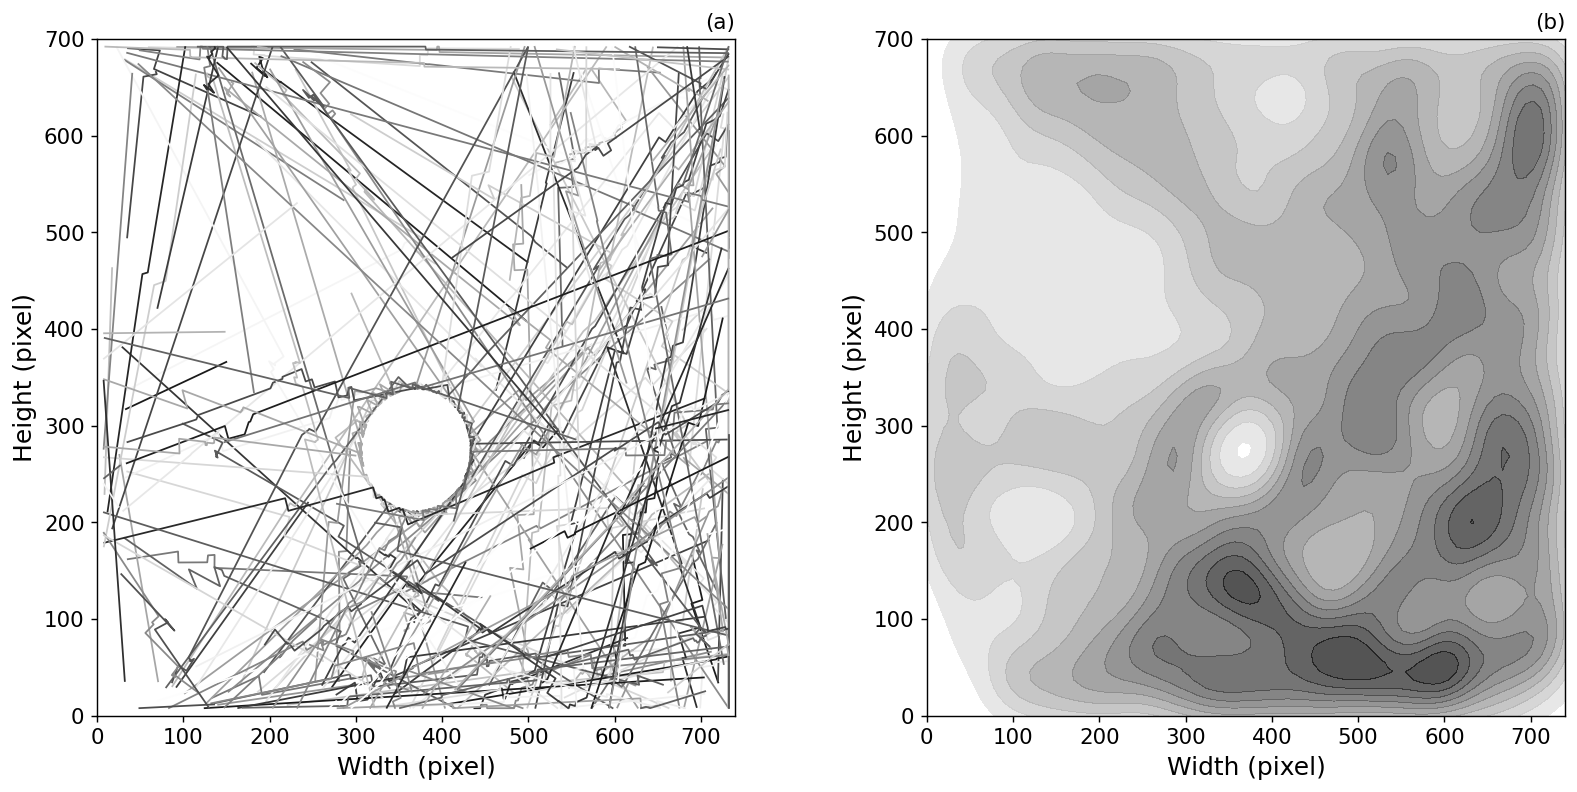

In [21]:
fig, ax = plt.subplots(num=None,figsize=(14.8, 7.0),dpi=128,facecolor='w',edgecolor='k',sharex='col',sharey='row')
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)

#fig.tight_layout(pad=0)
cmap=None
cbar=False
cmap = 'gray_r'
alpha=0.7
title="Density Map"

for i in range(len(xx)):
    gray_scale = np.random.uniform(0.1,1)
    ax1.plot (xx[i], yy[i], '-', lw=1, color=str(gray_scale))

from seaborn import kdeplot as sns_kdeplot
sns_kdeplot(*history_locs1, ax=ax2, cmap=cmap, alpha=alpha, shade=True, shade_lowest=False, cbar=cbar)

ax1.set_xlim(0, 740); ax1.set_ylim(0, 700)

plt.subplots_adjust(wspace = 0.3)
ax1.set_title('(a)', loc='right')
ax2.set_title('(b)', loc='right')

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Width (pixel)", fontsize=14); ax1.set_ylabel("Height (pixel)", fontsize=14)
ax2.set_xlabel("Width (pixel)", fontsize=14); ax2.set_ylabel("Height (pixel)", fontsize=14)

plt.savefig('fig-phil_trans/MODEL-trials_location_map.png', bbox_inches="tight")


## Analysis of local geographic density for AAMAS 2021 paper

Analysis with 274 real pedestrian.

In [1]:
import numpy as np

class Agent:
    def __init__(self, ID):
        self.unique_id = int(ID)
        self.status = 0
        self.location = np.array([[None, None]])

pop_total = 274
agents = [Agent(i) for i in range(pop_total)]

file_dir = 'gcs_final_real_data/frame_'

frame_i = 1500
frame_f = 3000
size = 7.0
local_density_radius = 10.0 * size
local_density = []

from scipy.spatial import cKDTree

for i in range(frame_i, frame_f):
    for agent in agents:
        agent.status = 0

    file_name = file_dir+str(i)+'.0.dat'
    ID, x, y = np.loadtxt(file_name,unpack=True)
    
    for j in range (len(ID)):
        agents[int(ID[j])].location = np.array([x[j], y[j]])
        agents[int(ID[j])].status = 1
    state = [agent.location for agent in agents if agent.status==1]  # get_state('location2D')
    tree = cKDTree(state)

    for j in  ID:
        neighbouring_agents = tree.query_ball_point(agents[int(j)].location, local_density_radius)
        local_density.append(len(neighbouring_agents) * size**2 / (local_density_radius**2 - size**2))

Normalized local geographic density:
Adjusted exponential decay parameter:  28.772078751013954


Text(0, 0.5, 'Frequency')

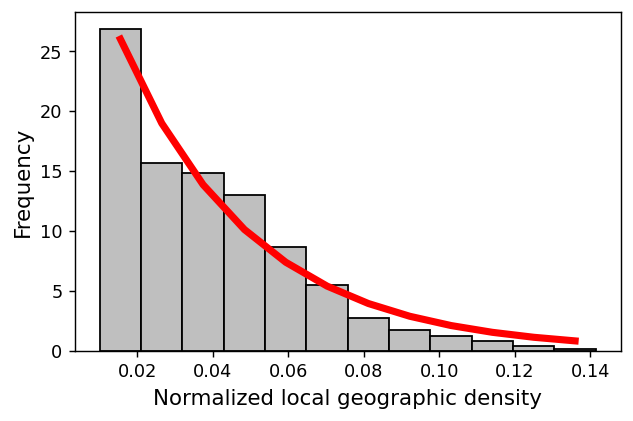

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(num=None,figsize=(5.5, 3.5),dpi=128,facecolor='w',edgecolor='k')

import math
n_bins = 12*math.ceil(max(local_density) - min(local_density))
n, bins, patches = ax.hist(local_density, bins=n_bins, density=True, color='0.75', edgecolor='k', lw = 1)

def exp(x, a, k):
    return a*np.exp(x*k)

from scipy.optimize import curve_fit

bins=(bins[1:]+bins[:-1])/2 # for len(x)==len(y)

expected=(0.0, -.5)
popt_exp, pcov_exp = curve_fit(exp, bins, n, expected)

print('Normalized local geographic density:')
print('Adjusted exponential decay parameter: ', -popt_exp[1])

plt.plot(bins,exp(bins,*popt_exp),color='r',lw=4)

plt.xlabel("Normalized local geographic density", fontsize=12)
plt.ylabel("Frequency", fontsize=12)